### DRL Course 2023 Домашнее задание 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 6]

#### Задача 1
Пользуясь алгоритмом Кросс-Энтропии обучить агента решать задачу Taxi-v3 из Gym. Исследовать гиперпараметры алгоритма и выбрать лучшие.

In [2]:
from korneeva_practice1_1 import grid_search_agent_parametrs

In [3]:
# Задаем сетку, по которой будем осуществлять поиск
iterations_grid = [10, 15, 20]
trajectories_grid = [100, 200, 300]
q_params_grid = [0.4, 0.5, 0.6, 0.7]

grid_search_agent_parametrs(iterations_grid, trajectories_grid, q_params_grid)

Parameters: iteration_n 10, trajectory_n 100, q_param 0.4
Total reward: -163
Parameters: iteration_n 10, trajectory_n 100, q_param 0.5
Total reward: -136
Parameters: iteration_n 10, trajectory_n 100, q_param 0.6
Total reward: -109
Parameters: iteration_n 10, trajectory_n 100, q_param 0.7
Total reward: -127
Parameters: iteration_n 10, trajectory_n 200, q_param 0.4
Total reward: -136
Parameters: iteration_n 10, trajectory_n 200, q_param 0.5
Total reward: -100
Parameters: iteration_n 10, trajectory_n 200, q_param 0.6
Total reward: -109
Parameters: iteration_n 10, trajectory_n 200, q_param 0.7
Total reward: -280
Parameters: iteration_n 10, trajectory_n 300, q_param 0.4
Total reward: -145
Parameters: iteration_n 10, trajectory_n 300, q_param 0.5
Total reward: -100
Parameters: iteration_n 10, trajectory_n 300, q_param 0.6
Total reward: -118
Parameters: iteration_n 10, trajectory_n 300, q_param 0.7
Total reward: -199
Parameters: iteration_n 15, trajectory_n 100, q_param 0.4
Total reward: -100

<b>Вывод:</b> 
При количестве итераций 15 и 20 алгоритм начинает сходиться к одной и той же точке даже при изменении оcтальных параметров.

Зафиксируем параметры, при которых достигается наибольший выигрыш:

In [10]:
best_iter_n = 20
best_q_param = 0.5
best_trajectory_n = 200

#### Задача 2
Реализовать алгоритм Кросс-Энтропии с двумя типами сглаживания,  указанными в лекции 1. При выбранных в пункте 1 гиперпараметров сравнить их результаты с результатами алгоритма без сглаживания.

In [11]:
from korneeva_practice1_2 import run

In [12]:
# Алгоритм без сглаживания
global_rewards = run(best_iter_n, best_q_param, best_trajectory_n)
# Сглаживание Laplace smoothing
global_rewards_laplace = run(best_iter_n, best_q_param, best_trajectory_n, 'laplace', {'laplace_lambda': 0.2})
# Сглаживание Policy smoothing
global_rewards_smoothie = run(best_iter_n, best_q_param, best_trajectory_n, 'smoothie', {'smoothie_lambda': 0.2})

Parameters: iteration_n 20, trajectory_n 200, q_param 0.5
Total reward: -100
Parameters: iteration_n 20, trajectory_n 200, q_param 0.5
Total reward: -136
Parameters: iteration_n 20, trajectory_n 200, q_param 0.5
Total reward: -190


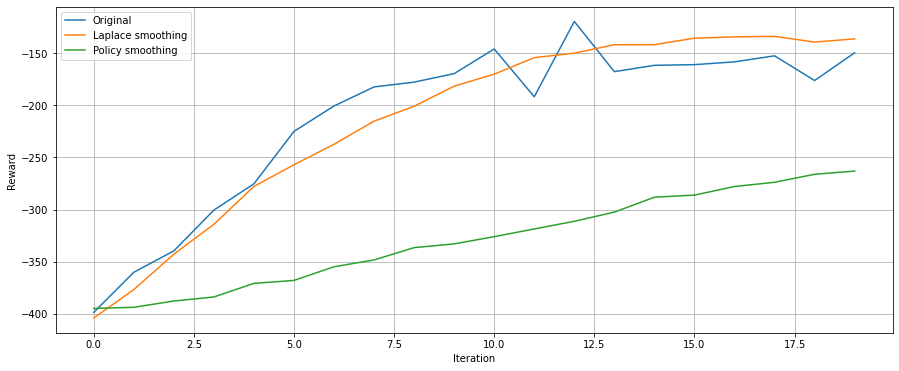

In [13]:
plt.plot(np.mean(global_rewards, axis=1), label='Original')
plt.plot(np.mean(global_rewards_laplace, axis=1), label='Laplace smoothing')
plt.plot(np.mean(global_rewards_smoothie, axis=1), label='Policy smoothing')

plt.xlabel("Iteration")
plt.ylabel("Reward")
plt.legend()

plt.grid()

<b>Вывод:</b> 
Добавление сглаживания не значительно влияет на результат работы алгоритма (хотя немного его улучшает в конкретно этой ситуации).

Но явно можно заметить, что алгоритм начинает сходиться более стабильно (со сглаживанием – зеленый и оранжевые графики) при наличии сглаживания.

#### Задача 3
Реализовать модификацию алгоритм Кросс-Энтропии для стохастических сред, указанную в лекции 1. Сравнить ее результат с алгоритмами из пунктов 1 и 2.

In [14]:
from korneeva_practice1_3 import run

In [16]:
M = 10

global_rewards_st = run(best_iter_n, best_trajectory_n, M)

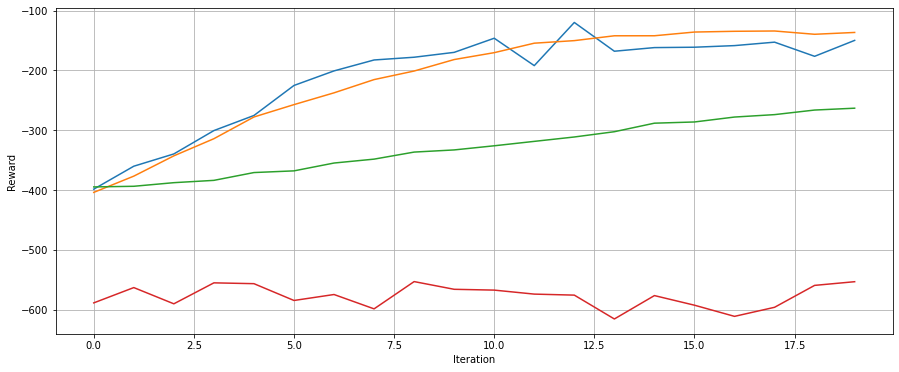

In [19]:
plt.rcParams['figure.figsize'] = [15, 6]

plt.plot(np.mean(global_rewards, axis=1), label='Original')
plt.plot(np.mean(global_rewards_laplace, axis=1), label='Laplace smoothing')
plt.plot(np.mean(global_rewards_smoothie, axis=1), label='Policy smoothing')
plt.plot(global_rewards_st, label='Stochastic environments')


plt.xlabel("Iteration")
plt.ylabel("Reward")

plt.grid()

<b>Вывод:</b> 
Добавление стохастической модификации привело к тому, что алгоритм не обучился.